# Time series

Using TensorFlow backend.


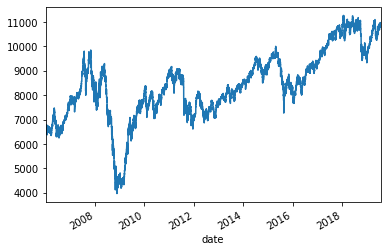

In [1]:
import finlab.utility as fl

# get price
twii = fl.get_price()

# plot twii
%matplotlib inline
twii.plot()

# Features

In [2]:
features = fl.create_features(twii)
feature_names = features.columns.tolist()
features.head()

,RSIb,RSIb2,RSIb3,RSIb4,RSIb5,RSIb6,MOMb,KDb,KDb2,KDb3,...,b6,b7,LINEARREG_SLOPE0,LINEARREG_SLOPE1,ADXR0,ADXR1,ADXR2,ADXR3,ADXR4,ADXR5
date,,,,,,,,,,,,,,,,,,,,,
2006-01-02 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-02 09:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-02 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-02 09:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-02 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Labels

In [3]:
import finlab.labels as labels

# continuous trading signal
# label = labels.continuous_trading_signal(twii, 30)

# fixed time horizon
# label = labels.fixed_time_horizon(twii, 30)

# trade point decision
# label = labels.trade_point_dicision(twii, 30)

# triple barrier
label = labels.triple_barrier(twii, 1.005, 0.995, 10).triple_barrier_signal == 1

/Users/cheng-yuhan/miniconda3/envs/finlab/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


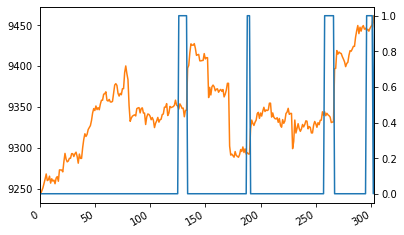

In [4]:
import pandas as pd
label['2017-01'].astype(int).plot(secondary_y=True, use_index=False)
twii['2017-01'].plot(use_index=False)

# Data preprocess

In [5]:
ss, features_scaled = fl.scale(features)
features_scaled_dropna, label_dropna = fl.dropna(features_scaled, label)

# Model and Training

In [14]:
import numpy as np


train_s = None
train_e ='2015'

x = features_scaled_dropna[train_s:train_e]
y = label_dropna[train_s:train_e] == 1


#########
#  CNN  #
#########

# model = fl.cnn_classifier_fit(x, y)
# ey = fl.predict_3d_feature(model, features_scaled_dropna)

##########
#  LSTM  #
##########

# model = fl.lstm_classifier_fit(x, y)
# ey = predict_3d_feature(model, features_scaled_dropna)

########
#  NN  #
########

model = fl.neural_network_classifier_fit(x, y)
ey = fl.predict_feature(model, features_scaled_dropna)


W0727 10:58:25.884906 4791760320 deprecation.py:323] From /Users/cheng-yuhan/miniconda3/envs/finlab/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4300      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 4,401
Trainable params: 4,401
Non-trainable params: 0
_________________________________________________________________
Train on 36176 samples, validate on 9045 samples
Epoch 1/200
36176/36176 [==============================] - 0s 8us/step - loss: 0.6405 - acc: 0.6834 - val_loss: 0.5427 - val_acc: 0.8231
Epoch 2/200
36176/36176 [==============================] - 0s 1us/step - loss: 0.6020 - acc: 0.7186 - val_loss: 0.5075 - val_acc: 0.8251
Epoch 3/200
36176/36176 [==============================] - 0s 1us/step - loss: 0.5891 - acc: 0.7173 - val_loss: 0.5057 - val_acc: 0.8242
Epoch 4/200
36176/36176 [==============================] - 0s 1us/step - los

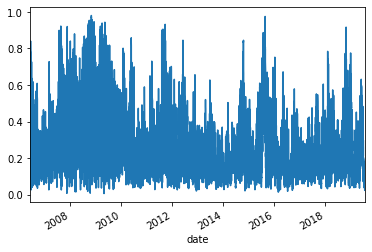

In [15]:
ey.plot()

# Backtest

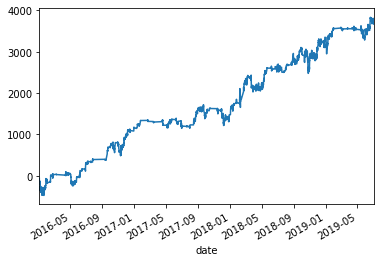

In [17]:
returns = (twii.shift(-1) - twii)[ey.index & twii.index]

signal = (ey > ey.quantile(0.6)).rolling(10).sum() > 0
returns[signal]['2016':].cumsum().plot()

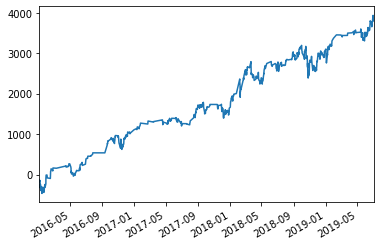

In [18]:
pd.Series(fl.backtest(signal, returns, stop_profit=400, stop_loss=-100))['2016':].cumsum().plot()


# Signal

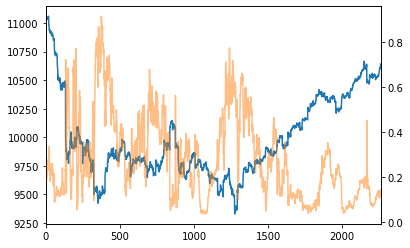

In [19]:
pd.Series(twii['2018Q4':'2019Q1'].values).plot()
pd.Series(ey['2018Q4':'2019Q1'].values).plot(alpha=0.5, secondary_y=True)

# Realtime signal

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a414f77f0>,
      dtype=object)

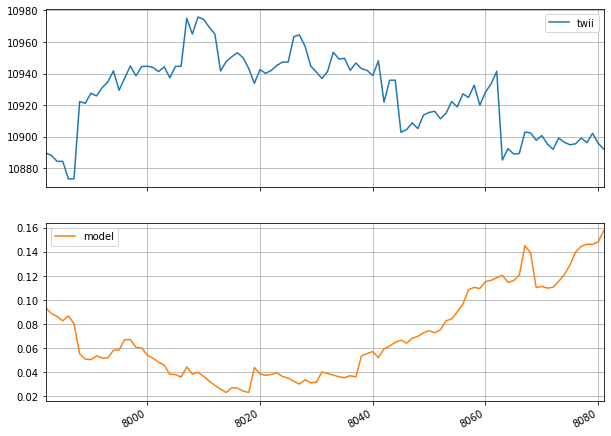

In [22]:
import matplotlib.pyplot as plt

y = fl.fugle_realtime("e1e25694b55c2986d5453f796900e447", twii, model, ss)
plt.rcParams['figure.figsize'] = (10, 8)
y.iloc[-100:].plot(subplots=True,grid=True)